In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report

# DBSCAN

In [2]:
history_df = pd.read_csv('history_all.csv')

In [3]:
# Select the features for anomaly detection
selected_features = ['travel_time', 'dwell_time', 'day_of_week', 'weekend', 'rush_hour', 'excess_travel_time']
X = history_df[selected_features]

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Choose DBSCAN for anomaly detection
# Adjust the parameters (eps and min_samples) based on your data characteristics
eps = 0.5  # Maximum distance between samples to be considered in the same neighborhood
min_samples = 5  # Minimum number of samples in a neighborhood to be considered a core point
model = DBSCAN(eps=eps, min_samples=min_samples)

In [6]:
# Fit the model
labels = model.fit_predict(X_scaled)

In [7]:
# Add the cluster labels to the DataFrame
history_df['cluster'] = labels

# Identify anomalies as samples labeled as -1 (not assigned to any cluster)
history_df['anomaly'] = (history_df['cluster'] == -1).astype(int)

# Print a classification report for evaluating model performance
print(classification_report(history_df['anomaly'], history_df['anomaly'], target_names=['Normal', 'Anomaly']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      1634
     Anomaly       1.00      1.00      1.00       157

    accuracy                           1.00      1791
   macro avg       1.00      1.00      1.00      1791
weighted avg       1.00      1.00      1.00      1791



In [8]:
history_df

,device_id,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,cluster,anomaly
0,116,1,2022-10-01,08:41:39,09:35:36,Digana,Kandy,53.950000,5.916667,0.109669,5,Saturday,8.75,1,1,0.433333,Digana-Kandy,-1,1
1,116,2,2022-10-01,09:51:51,10:42:47,Kandy,Digana,50.933333,5.000000,0.098168,5,Saturday,9.75,1,0,-2.583333,Kandy-Digana,0,0
2,116,3,2022-10-01,13:42:11,14:30:32,Digana,Kandy,48.350000,5.800000,0.119959,5,Saturday,13.75,1,0,-5.166667,Digana-Kandy,0,0
3,116,4,2022-10-01,15:09:08,16:00:26,Kandy,Digana,51.300000,6.850000,0.133528,5,Saturday,15.25,1,0,-2.216667,Kandy-Digana,0,0
4,116,5,2022-10-02,07:42:11,08:22:32,Digana,Kandy,40.350000,4.266667,0.105741,6,Sunday,7.75,1,1,-13.166667,Digana-Kandy,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,1377,1906,2022-10-30,08:11:22,08:55:47,Digana,Kandy,44.416667,7.600000,0.171107,6,Sunday,8.25,1,1,-9.100000,Digana-Kandy,1,0
1787,1377,1907,2022-10-30,09:21:27,10:07:42,Kandy,Digana,46.250000,3.200000,0.069189,6,Sunday,9.25,1,0,-7.266667,Kandy-Digana,2,0
1788,1377,1908,2022-10-30,12:39:33,13:31:48,Digana,Kandy,52.250000,11.216667,0.214673,6,Sunday,12.75,1,0,-1.266667,Digana-Kandy,-1,1
1789,1377,1909,2022-10-30,13:51:30,14:43:18,Kandy,Digana,51.800000,4.183333,0.080759,6,Sunday,13.75,1,0,-1.716667,Kandy-Digana,2,0


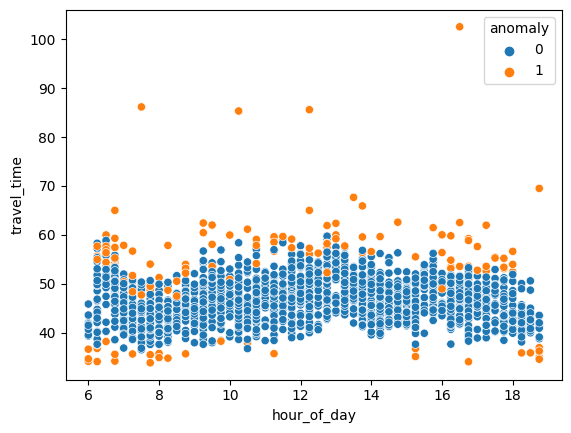

In [9]:
# plot the anomalies vs hour_of_day
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='hour_of_day', y='travel_time', hue='anomaly', data=history_df)
plt.show()

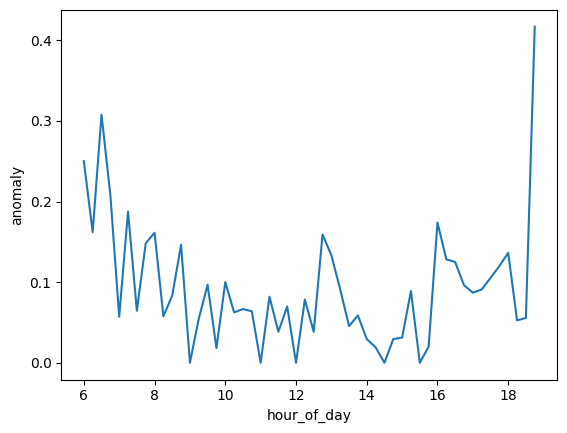

In [10]:
# percentage of anomalies vs hour_of_day
anomaly_percentage = history_df.groupby('hour_of_day')['anomaly'].mean().reset_index()
sns.lineplot(x='hour_of_day', y='anomaly', data=anomaly_percentage)
plt.show()

# Anomaly detection

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
trip_data = pd.read_csv('history_all.csv')
trip_data.head()

,device_id,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction
0,116,1,2022-10-01,08:41:39,09:35:36,Digana,Kandy,53.950000,5.916667,0.109669,5,Saturday,8.75,1,1,0.433333,Digana-Kandy
1,116,2,2022-10-01,09:51:51,10:42:47,Kandy,Digana,50.933333,5.000000,0.098168,5,Saturday,9.75,1,0,-2.583333,Kandy-Digana
2,116,3,2022-10-01,13:42:11,14:30:32,Digana,Kandy,48.350000,5.800000,0.119959,5,Saturday,13.75,1,0,-5.166667,Digana-Kandy
3,116,4,2022-10-01,15:09:08,16:00:26,Kandy,Digana,51.300000,6.850000,0.133528,5,Saturday,15.25,1,0,-2.216667,Kandy-Digana
4,116,5,2022-10-02,07:42:11,08:22:32,Digana,Kandy,40.350000,4.266667,0.105741,6,Sunday,7.75,1,1,-13.166667,Digana-Kandy


In [13]:
# Find rows with travel_time < 0
rows_to_drop = trip_data[trip_data['travel_time'] < 0].index

# Drop the identified rows
trip_data.drop(rows_to_drop, inplace=True)

In [14]:
trip_data.shape

(1791, 17)

In [15]:
filtered_trip_data = trip_data[(trip_data['travel_time'] < 55) & (trip_data['dwell_time'] < 20)]
filtered_trip_data.shape

(1670, 17)

In [16]:
#divide filtered_trip_data into two dataframes: 0.8 and 0.2
train, test = train_test_split(filtered_trip_data, test_size=0.05)

In [17]:
anomalies = trip_data[(trip_data['travel_time'] >= 55) | (trip_data['dwell_time'] >= 20)]
anomalies1,anomalies2 = train_test_split(anomalies, test_size=0.05)

In [18]:
# concat test and anomalies
test = pd.concat([test, anomalies2])

In [19]:
train.shape

(1586, 17)

In [20]:
test.shape

(91, 17)

In [21]:
from sklearn.ensemble import IsolationForest
selected_features = ['travel_time', 'dwell_time', 'day_of_week', 'weekend', 'rush_hour', 'excess_travel_time']
data = trip_data[selected_features]

scaler = StandardScaler()
data = scaler.fit_transform(data)
# Create an instance of the IsolationForest
isolation_forest = IsolationForest(contamination=0.1)  # You can adjust the contamination parameter

# Fit the model to the data
isolation_forest.fit(data)

# Predict outliers
predictions = isolation_forest.predict(data)

# The predictions will be 1 for inliers (normal points) and -1 for outliers


In [22]:
# change predictions array to a column for trip_data
trip_data['outlier'] = predictions

In [23]:
# replace -1 with anomaly and 1 with normal
trip_data['outlier'] = trip_data['outlier'].map({1: 'normal', -1: 'anomaly'})

In [24]:
data = trip_data

In [25]:
data

,device_id,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,outlier
0,116,1,2022-10-01,08:41:39,09:35:36,Digana,Kandy,53.950000,5.916667,0.109669,5,Saturday,8.75,1,1,0.433333,Digana-Kandy,anomaly
1,116,2,2022-10-01,09:51:51,10:42:47,Kandy,Digana,50.933333,5.000000,0.098168,5,Saturday,9.75,1,0,-2.583333,Kandy-Digana,normal
2,116,3,2022-10-01,13:42:11,14:30:32,Digana,Kandy,48.350000,5.800000,0.119959,5,Saturday,13.75,1,0,-5.166667,Digana-Kandy,normal
3,116,4,2022-10-01,15:09:08,16:00:26,Kandy,Digana,51.300000,6.850000,0.133528,5,Saturday,15.25,1,0,-2.216667,Kandy-Digana,normal
4,116,5,2022-10-02,07:42:11,08:22:32,Digana,Kandy,40.350000,4.266667,0.105741,6,Sunday,7.75,1,1,-13.166667,Digana-Kandy,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,1377,1906,2022-10-30,08:11:22,08:55:47,Digana,Kandy,44.416667,7.600000,0.171107,6,Sunday,8.25,1,1,-9.100000,Digana-Kandy,anomaly
1787,1377,1907,2022-10-30,09:21:27,10:07:42,Kandy,Digana,46.250000,3.200000,0.069189,6,Sunday,9.25,1,0,-7.266667,Kandy-Digana,normal
1788,1377,1908,2022-10-30,12:39:33,13:31:48,Digana,Kandy,52.250000,11.216667,0.214673,6,Sunday,12.75,1,0,-1.266667,Digana-Kandy,anomaly
1789,1377,1909,2022-10-30,13:51:30,14:43:18,Kandy,Digana,51.800000,4.183333,0.080759,6,Sunday,13.75,1,0,-1.716667,Kandy-Digana,normal


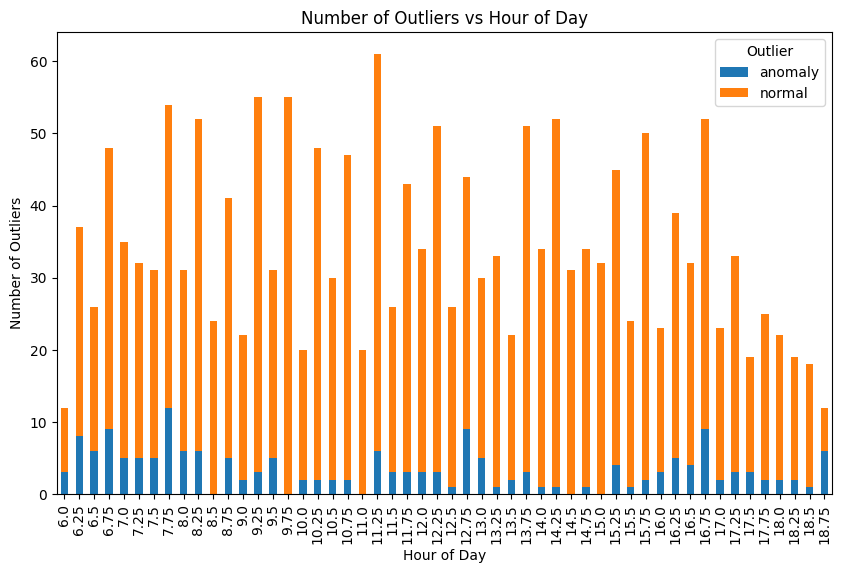

In [26]:
# Group data by 'hour_of_day' and 'outlier' and count the occurrences
grouped_data = data.groupby(['hour_of_day', 'outlier']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='hour_of_day', columns='outlier', values='count')

# Create the bar chart using Matplotlib
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers vs Hour of Day')

# Show the legend
plt.legend(title='Outlier')

# Show the plot
plt.show()


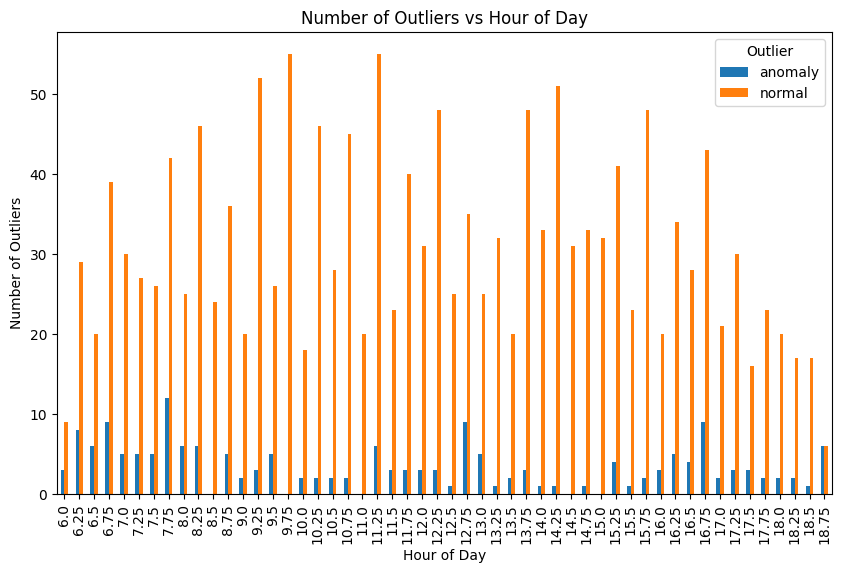

In [27]:
# Group data by 'hour_of_day' and 'outlier' and count the occurrences
grouped_data = data.groupby(['hour_of_day', 'outlier']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='hour_of_day', columns='outlier', values='count')

# Create the clustered bar chart using Matplotlib
pivot_data.plot(kind='bar', figsize=(10, 6))

# Set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers vs Hour of Day')

# Show the legend
plt.legend(title='Outlier')

# Show the plot
plt.show()

In [28]:
# trip_data.to_csv('history.csv', index=False)

# travel time prediction 

In [29]:
data


,device_id,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,outlier
0,116,1,2022-10-01,08:41:39,09:35:36,Digana,Kandy,53.950000,5.916667,0.109669,5,Saturday,8.75,1,1,0.433333,Digana-Kandy,anomaly
1,116,2,2022-10-01,09:51:51,10:42:47,Kandy,Digana,50.933333,5.000000,0.098168,5,Saturday,9.75,1,0,-2.583333,Kandy-Digana,normal
2,116,3,2022-10-01,13:42:11,14:30:32,Digana,Kandy,48.350000,5.800000,0.119959,5,Saturday,13.75,1,0,-5.166667,Digana-Kandy,normal
3,116,4,2022-10-01,15:09:08,16:00:26,Kandy,Digana,51.300000,6.850000,0.133528,5,Saturday,15.25,1,0,-2.216667,Kandy-Digana,normal
4,116,5,2022-10-02,07:42:11,08:22:32,Digana,Kandy,40.350000,4.266667,0.105741,6,Sunday,7.75,1,1,-13.166667,Digana-Kandy,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,1377,1906,2022-10-30,08:11:22,08:55:47,Digana,Kandy,44.416667,7.600000,0.171107,6,Sunday,8.25,1,1,-9.100000,Digana-Kandy,anomaly
1787,1377,1907,2022-10-30,09:21:27,10:07:42,Kandy,Digana,46.250000,3.200000,0.069189,6,Sunday,9.25,1,0,-7.266667,Kandy-Digana,normal
1788,1377,1908,2022-10-30,12:39:33,13:31:48,Digana,Kandy,52.250000,11.216667,0.214673,6,Sunday,12.75,1,0,-1.266667,Digana-Kandy,anomaly
1789,1377,1909,2022-10-30,13:51:30,14:43:18,Kandy,Digana,51.800000,4.183333,0.080759,6,Sunday,13.75,1,0,-1.716667,Kandy-Digana,normal


In [ ]:
'''Data Preprocessing:

Handle any missing data in the dataset.
Encode categorical variables such as "start_terminal" and "end_terminal" using techniques like one-hot encoding or label encoding.
Convert date and time-related columns to appropriate data types.'''

# Path: DataPreprocessing.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
# Assuming 'data' contains your dataset

# Data preprocessing steps (for simplification, we assume that the features and target are already prepared)
# Select the relevant features and target variable
features = data[['day_of_week', 'hour_of_day', 'weekend', 'rush_hour']]
target = data['travel_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Root Mean Squared Error (RMSE): 4.82267687310793
Mean Absolute Error (MAE): 3.7976636998276536
R-squared (R2): 0.047738721078041446
